In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
import datetime

import matplotlib.font_manager as font_manager
import tueplots
# tueplots.bundles.fonts

from matplotlib import ticker
from tueplots import bundles
from tueplots.constants.color import rgb


In [15]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# path to sans serif' /System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Microsoft Sans Serif'
# font_manager.findSystemFonts(fontpaths='~/lenardrommel/Library/Fonts/sans-serif.ttf', fontext="ttf")


In [32]:
sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=17)   # fontsize of the tick labels
plt.rc('ytick', labelsize=17)   # fontsize of the tick labels
plt.rc('legend', fontsize=17)   # legend fontsize
plt.rc('font', size=17)         # controls default text sizes
plt.rc('font', family='serif', serif='Times New Roman')
sns.color_palette('pastel')     # set to 'deep' or 'pastel'

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [33]:
data = pd.read_csv('anonymized.csv')
# date_format = "%a,%d,%b,%Y,%H:%M"
df = data[data['pseudonym'] != 'Putzfrau']
df.insert(2, 'date', '')
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')

# Drop the original 'day', 'month', and 'year' columns if needed
df = df.drop(columns=['day', 'month', 'year'])


/var/folders/kd/3t0zj8gs1zz4f2qpq9dpm0xw0000gn/T/ipykernel_57131/658056574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')


In [34]:
occupancy_per_weekday = df.groupby(['sex', 'weekday']).size()
male_df = occupancy_per_weekday.loc['m'].reset_index(name='occurrences')
female_df = occupancy_per_weekday.loc['f'].reset_index(name='occurrences')
df

,weekday,date,start_time,end_time,duration(in h),pseudonym,sex,machine
0,Mo,2022-12-05,12:00,13:00,1.0,F1,f,2
1,Mo,2022-12-05,13:00,14:00,1.0,F2,f,2
2,Di,2022-12-06,12:00,13:00,1.0,M1,m,1
3,Di,2022-12-06,13:00,14:30,1.5,M2,m,1
4,Di,2022-12-06,14:30,15:30,1.0,M3,m,1
...,...,...,...,...,...,...,...,...
2341,Mo,2023-12-04,10:30,11:30,1.0,M36,m,2
2342,Mo,2023-12-04,11:30,12:30,1.0,M7,m,2
2343,Mo,2023-12-04,15:00,16:00,1.0,M1,m,2
2344,Mo,2023-12-04,17:20,18:20,1.0,M44,m,1


In [35]:
custom_order = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
custom_order_eng = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Convert 'datetime' column to Categorical with custom order
male_df['weekday'] = pd.Categorical(male_df.weekday, categories=custom_order, ordered=True)
female_df['weekday'] = pd.Categorical(female_df.weekday, categories=custom_order, ordered=True)

# Sort DataFrames by 'datetime'
male_df = male_df.sort_values('weekday')
female_df = female_df.sort_values('weekday')
male_df.set_index('weekday')
female_df.set_index('weekday')

df = pd.DataFrame({'Day': custom_order_eng, 'Males': list(male_df['occurrences']),
                   'Females': list(female_df['occurrences'])}, index=custom_order)
df_melted = pd.melt(df, id_vars=['Day'], var_name='Gender', value_name='Count')
df_melted['total'] = df_melted.groupby('Day')['Count'].transform('sum')
df_melted['Count'] = df_melted['Count'] / 52
df_melted['total'] = df_melted['total'] / 52


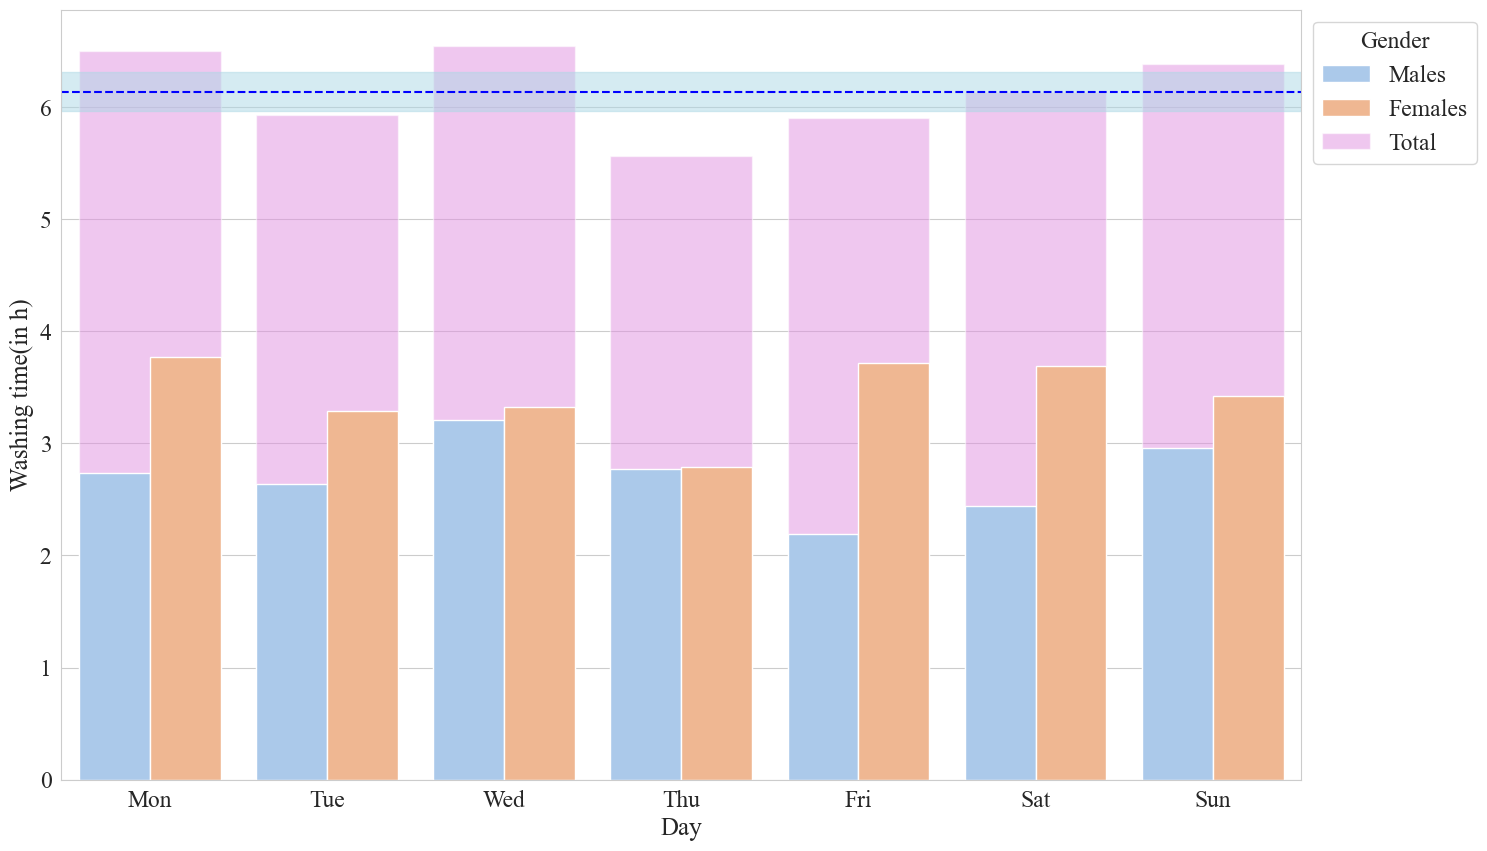

In [36]:
fig, ax = plt.subplots(figsize=(16, 10))

ax = sns.barplot(x='Day', y='total', data=df_melted, color='violet', errorbar=None, alpha=0.5, label='Total')
ax = sns.barplot(x='Day', y='Count', hue='Gender', data=df_melted, palette='pastel')
ax.axhline(y=df_melted['total'].mean(), color='blue', linestyle='--', label='Mean')
ax.axhspan(ymin=df_melted['total'].mean() - df_melted['total'].std() / 2, ymax=df_melted['total'].mean() + df_melted['total'].std() / 2, color='lightblue', alpha=0.5)
# df_melted['total'].mean()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Washing time(in h)')
fig.savefig('Data_per_weekday.png')


In [21]:
# normalize for every day in procent
# 20 % of males wash at day blabla
# 20 % of females wash at day blabla
# 20% of all genders wash at day blabla

In [40]:
data = pd.read_csv('anonymized.csv')
# date_format = "%a,%d,%b,%Y,%H:%M"
df = data[data['pseudonym'] != 'Putzfrau']
df.insert(2, 'date', '')
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')

df

/var/folders/kd/3t0zj8gs1zz4f2qpq9dpm0xw0000gn/T/ipykernel_57131/2866362091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')


,weekday,day,date,month,year,start_time,end_time,duration(in h),pseudonym,sex,machine
0,Mo,5,2022-12-05,December,2022,12:00,13:00,1.0,F1,f,2
1,Mo,5,2022-12-05,December,2022,13:00,14:00,1.0,F2,f,2
2,Di,6,2022-12-06,December,2022,12:00,13:00,1.0,M1,m,1
3,Di,6,2022-12-06,December,2022,13:00,14:30,1.5,M2,m,1
4,Di,6,2022-12-06,December,2022,14:30,15:30,1.0,M3,m,1
...,...,...,...,...,...,...,...,...,...,...,...
2341,Mo,4,2023-12-04,December,2023,10:30,11:30,1.0,M36,m,2
2342,Mo,4,2023-12-04,December,2023,11:30,12:30,1.0,M7,m,2
2343,Mo,4,2023-12-04,December,2023,15:00,16:00,1.0,M1,m,2
2344,Mo,4,2023-12-04,December,2023,17:20,18:20,1.0,M44,m,1


In [38]:
data = pd.read_csv('anonymized.csv')
# date_format = "%a,%d,%b,%Y,%H:%M"
df = data[data['pseudonym'] != 'Putzfrau']

df.insert(2, 'date', '')
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')

# Drop the original 'day', 'month', and 'year' columns if needed
df = df.drop(columns=['day', 'month', 'year', 'start_time', 'end_time'])
df

/var/folders/kd/3t0zj8gs1zz4f2qpq9dpm0xw0000gn/T/ipykernel_57131/1019993896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' ' + df['year'].astype(str), format='%d %B %Y')


,weekday,date,duration(in h),pseudonym,sex,machine
0,Mo,2022-12-05,1.0,F1,f,2
1,Mo,2022-12-05,1.0,F2,f,2
2,Di,2022-12-06,1.0,M1,m,1
3,Di,2022-12-06,1.5,M2,m,1
4,Di,2022-12-06,1.0,M3,m,1
...,...,...,...,...,...,...
2341,Mo,2023-12-04,1.0,M36,m,2
2342,Mo,2023-12-04,1.0,M7,m,2
2343,Mo,2023-12-04,1.0,M1,m,2
2344,Mo,2023-12-04,1.0,M44,m,1


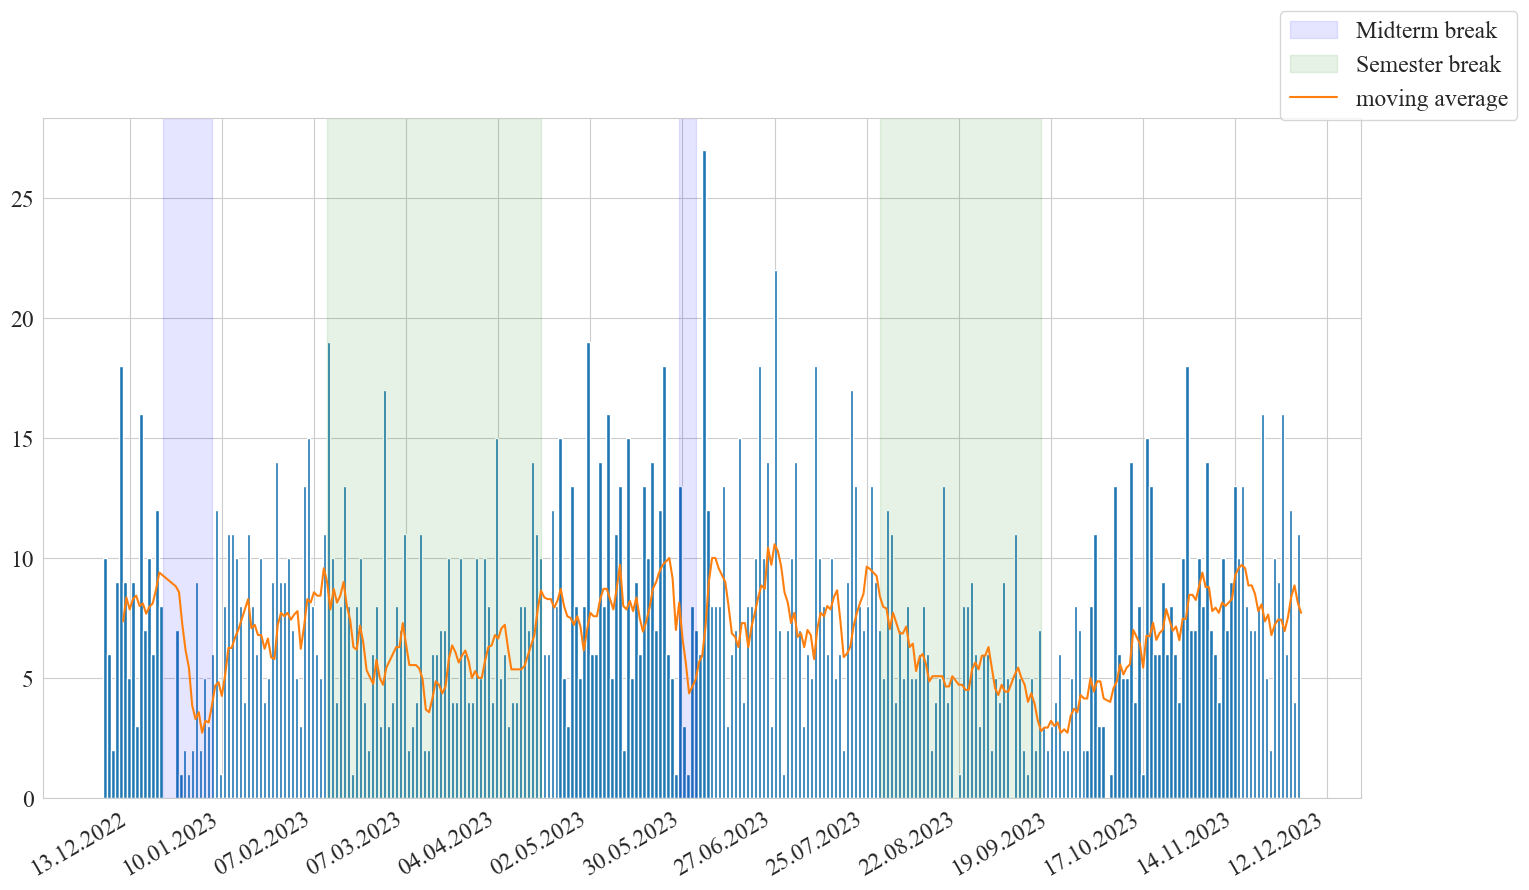

In [39]:
def sum_usage_per_day(df):
    daily_usage = df.groupby('date')['duration(in h)'].sum()
    return daily_usage

daily_usage = sum_usage_per_day(df.copy())

# Calculate moving average with a window size of 7 days
moving_average = daily_usage.rolling(window=7).mean()

start_date = df['date'][0]
end_date = df['date'][2345]
christmas = datetime.datetime(2022, 12, 23)
ss_start = datetime.datetime(2023, 4, 17)
ss_end = datetime.datetime(2023, 7, 29)
ws_start = datetime.datetime(2023, 9, 16)
ws_end = datetime.datetime(2023, 2, 11)

fig, ax = plt.subplots(figsize=(17, 10))


n, bins, patches = ax.hist(df['date'], bins=300, range=(start_date, end_date), width=1.0)

ax.axvspan(xmin=christmas, xmax=datetime.datetime(2023, 1, 7), alpha=0.1, color='blue', label='Midterm break')
ax.axvspan(xmin=datetime.datetime(2023, 5, 29), xmax=datetime.datetime(2023, 6, 3), alpha=0.1, color='blue')
ax.axvspan(xmin=ws_end, xmax=ss_start, color='green', alpha=0.1, label='Semester break')
ax.axvspan(xmin=ss_end, xmax=ws_start, color='green', alpha=0.1)
# ax.axvline(ss_start, color='yellow')
# ax.axvline(ss_end, color='yellow')

date_form = DateFormatter("%d.%m.%Y")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=3)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.plot(moving_average, label='moving average')
fig.autofmt_xdate()
fig.legend()
fig.savefig('data-for-year.png')